In [1]:
setwd('../')

In [2]:
library('igraph')
library('brainGraph')
library("AnnotationDbi")
library("org.Hs.eg.db")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain 

### Load layers

In [3]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH 703a3d4 UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from 703a3d4 (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [4]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome,directed = FALSE)
reactome

IGRAPH e12cdfb UN-- 10618 875436 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from e12cdfb (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [5]:
metabolome <- read.table(file= "data/Networks/Recon3DSinDuplicados.csv")
metabolome <- graph_from_data_frame(metabolome,directed = FALSE)
metabolome

IGRAPH 4a006ad UN-- 1863 902188 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 4a006ad (vertex names):
 [1] 55349--123745 55349--3141   55349--272    55349--275    55349--55830 
 [6] 55349--6548   55349--2820   55349--1589   55349--4668   55349--2495  
[11] 55349--339221 55349--3029   55349--3028   55349--222962 55349--7991  
[16] 55349--80201  55349--85320  55349--645740 55349--525    55349--526   
[21] 55349--527    55349--523    55349--528    55349--529    55349--1103  
[26] 55349--10331  55349--122618 55349--390928 55349--9524   55349--1337  
[31] 55349--440    55349--2766   55349--4190   55349--4191   55349--9843  
[36] 55349--9489   55349--53947  55349--197258 55349--146712 55349--9481  
+ ... omitted several edges

## 1. ACOT2

In [6]:
# map ENTREZ for PPFIBP2 module genes (Supplementary Figure 8, n=5)
#ppfibp2_genes <- c('CDH23', 'CDH3','UNC13C','DMXL2','UNC13B','AKNAD1','VAMP1','RPH3A','RAPSN','DOK7','BAIAP3','PPFIBP2')
ppfibp2_genes <- c('ACOT2','CHAT','GMPBB','SLC25A1','SLC5A7','SLC44A4','ZC3H3','HEATR1','FHAD1','SELENOO','MYH15','RPL3L','ATP6V0A4','AMPD1','CASP5','FHOD3','ATAD3C','CASP12','ATAD3B','SLC25A1','GFPT1','DPAGT1','ALG14','RPTN')
entrez_genes <- mapIds(org.Hs.eg.db,keys = ppfibp2_genes,column = "ENTREZID",keytype="SYMBOL",multiVals = "first") #Gene(RefSeq) is conveniently removed here. here.
entrez_genes
length(entrez_genes)

'select()' returned 1:1 mapping between keys and columns



ACOT2        CHAT       GMPBB     SLC25A1      SLC5A7     SLC44A4 
    "10965"      "1103"          NA      "6576"     "60482"     "80736" 
      ZC3H3      HEATR1       FHAD1     SELENOO       MYH15       RPL3L 
    "23144"     "55127"    "114827"     "83642"     "22989"      "6123" 
   ATP6V0A4       AMPD1       CASP5       FHOD3      ATAD3C      CASP12 
    "50617"       "270"       "838"     "80206"    "219293" "100506742" 
     ATAD3B     SLC25A1       GFPT1      DPAGT1       ALG14        RPTN 
    "83858"      "6576"      "2673"      "1798"    "199857"    "126638"

[1] 24

### 1.1. Interactome

In [7]:
# Extract subgraphs

int_subgraph <- igraph::subgraph(entrez_genes[entrez_genes %in% V(interactome)$name],graph = interactome)
int_subgraph

IGRAPH 66f5e42 UN-- 22 3 -- 
+ attr: name (v/c)
+ edges from 66f5e42 (vertex names):
[1] 100506742--838    1103     --60482  1798     --199857

In [8]:
V(int_subgraph)$name

[1] "23144"     "6576"      "270"       "55127"     "126638"    "2673"     
 [7] "1103"      "100506742" "10965"     "219293"    "83858"     "838"      
[13] "50617"     "60482"     "1798"      "199857"    "6123"      "83642"    
[19] "80206"     "22989"     "114827"    "80736"

In [9]:
names(entrez_genes)[match(V(int_subgraph)$name,entrez_genes)]

[1] "ZC3H3"    "SLC25A1"  "AMPD1"    "HEATR1"   "RPTN"     "GFPT1"   
 [7] "CHAT"     "CASP12"   "ACOT2"    "ATAD3C"   "ATAD3B"   "CASP5"   
[13] "ATP6V0A4" "SLC5A7"   "DPAGT1"   "ALG14"    "RPL3L"    "SELENOO" 
[19] "FHOD3"    "MYH15"    "FHAD1"    "SLC44A4"

In [10]:
V(int_subgraph)$name <- names(entrez_genes)[match(V(int_subgraph)$name,entrez_genes)]

In [11]:
int_subgraph

IGRAPH 66f5e42 UN-- 22 3 -- 
+ attr: name (v/c)
+ edges from 66f5e42 (vertex names):
[1] CASP12--CASP5  CHAT  --SLC5A7 DPAGT1--ALG14 

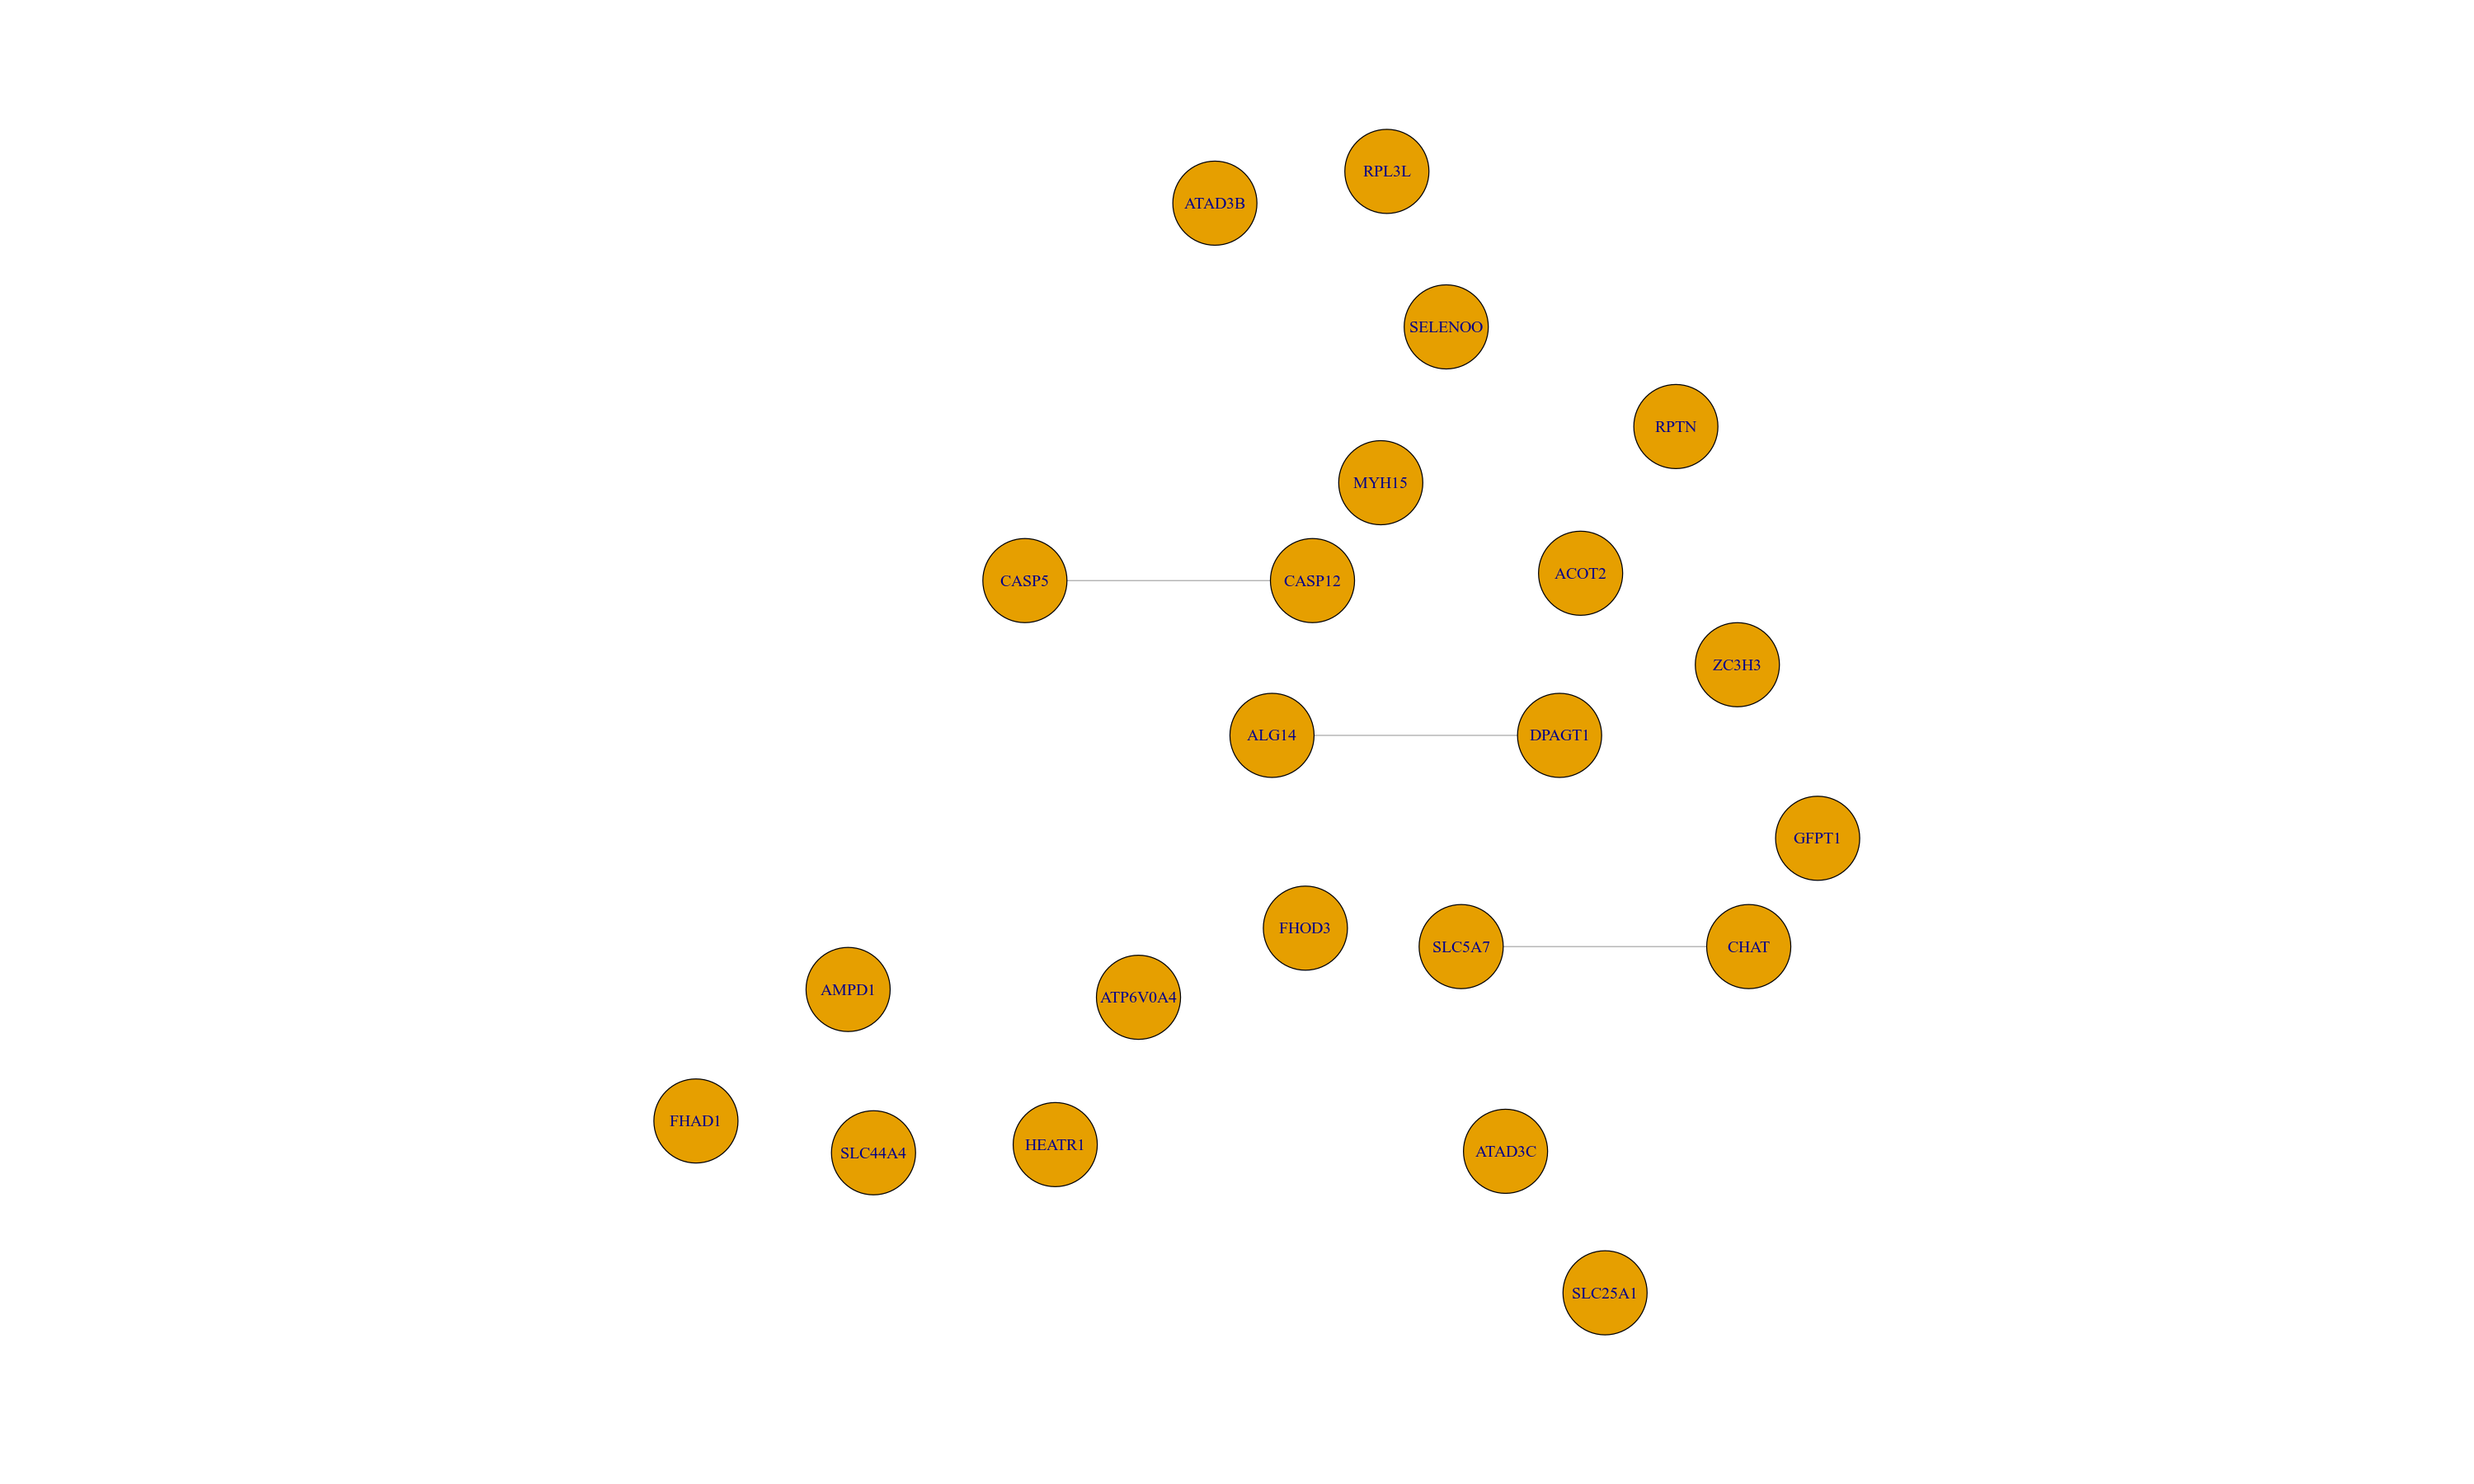

In [12]:
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(int_subgraph, layout = layout_components)

### 1.2. Reactome

In [13]:
reactome

IGRAPH e12cdfb UN-- 10618 875436 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from e12cdfb (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [14]:
entrez_genes %in% V(reactome)$name

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE
[13]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [15]:
# Extract subgraphs

react_subgraph <- igraph::subgraph(entrez_genes[entrez_genes %in% V(reactome)$name],graph = reactome)
react_subgraph

IGRAPH 6d0a502 UN-- 14 5 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 6d0a502 (vertex names):
[1] 6123 --55127  1103 --80736  1103 --60482  80736--60482  1798 --199857

In [16]:
V(react_subgraph)$name <- names(entrez_genes)[match(V(react_subgraph)$name,entrez_genes)]

In [17]:
react_subgraph

IGRAPH 6d0a502 UN-- 14 5 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 6d0a502 (vertex names):
[1] RPL3L  --HEATR1  CHAT   --SLC44A4 CHAT   --SLC5A7  SLC44A4--SLC5A7 
[5] DPAGT1 --ALG14  

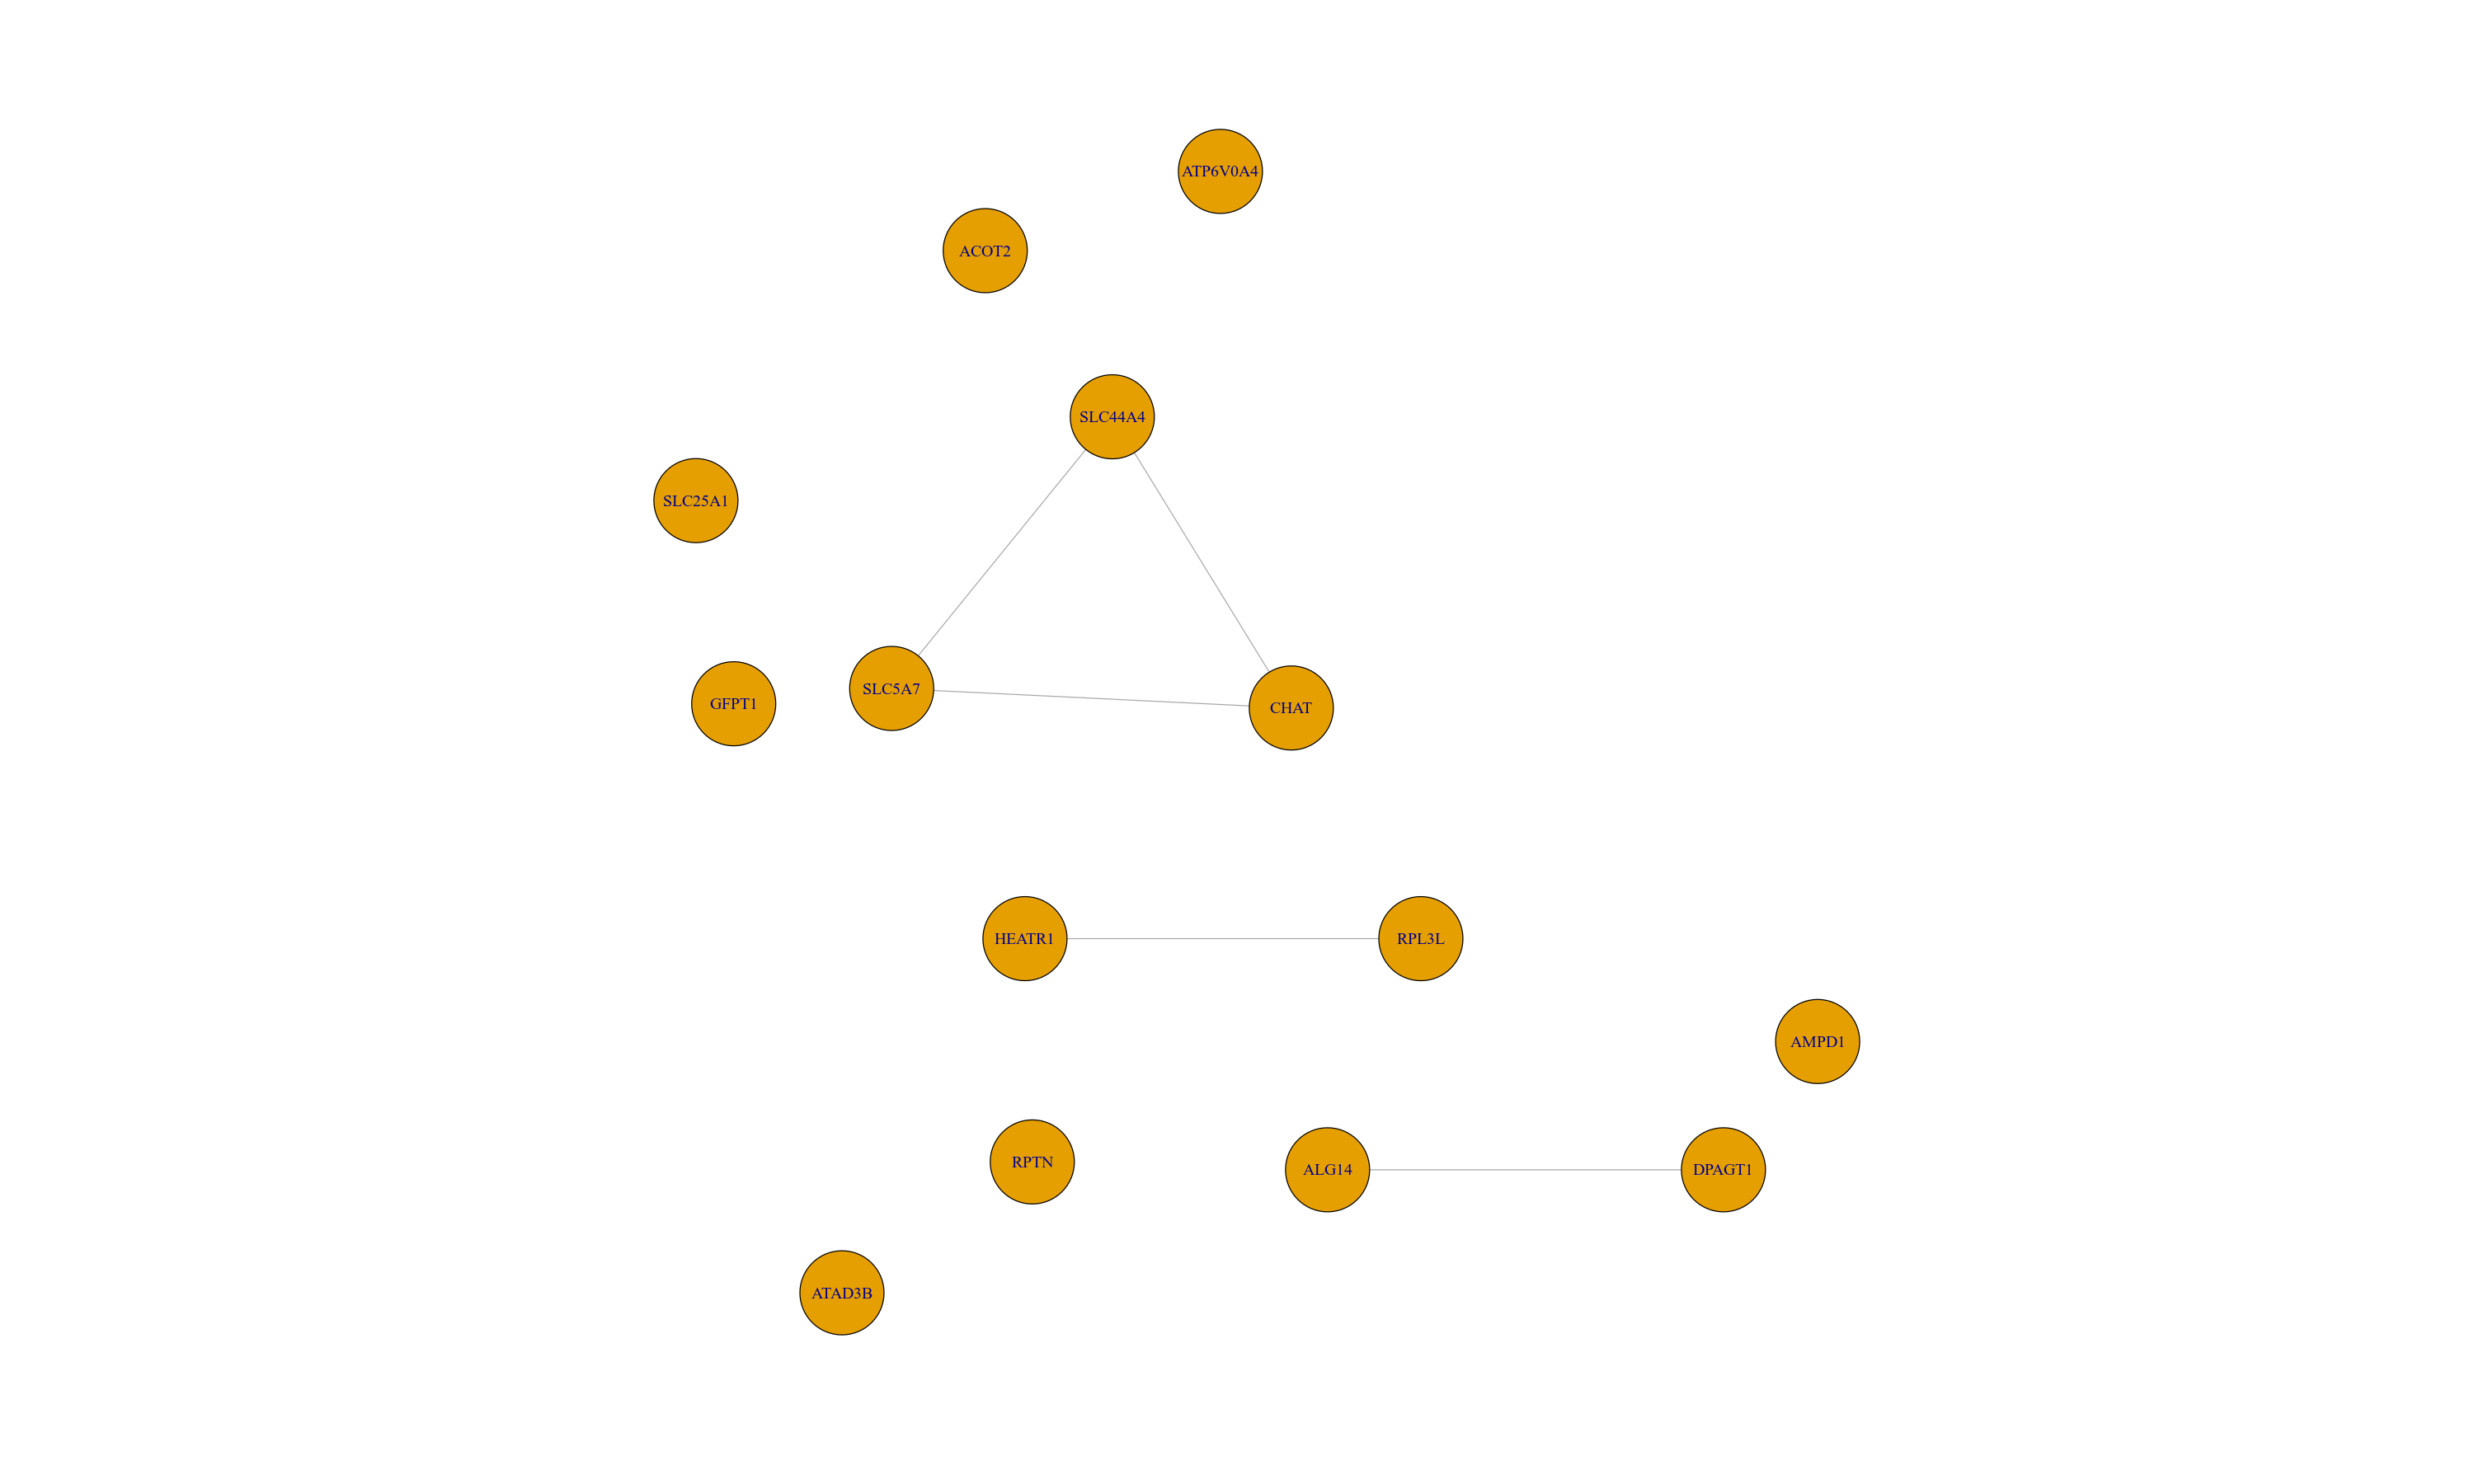

In [18]:
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(react_subgraph, layout = layout_components)